<a href="https://colab.research.google.com/github/rus4787/Business-evaluation-of-the-product/blob/main/Marina_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B8_%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

In [ ]:
!pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
import phik
from phik.report import plot_correlation_matrix

## Продажи продукта

In [ ]:
# Определяем количество строк
num_rows = 1000
# Определяем список продуктов
products = ['product_1', 'product_2', 'product_3']
# Генерируем случайные данные
random_products = [random.choice(products) for _ in range(num_rows)]
dates = [f'2021-01-{random.randint(1, 28):02d}' for _ in range(num_rows)]
prices = [random.randint(100, 1000) for _ in range(num_rows)]
# Создаем DataFrame
df = pd.DataFrame({
    'Product': random_products,
    'Date': dates,
    'Price': prices
})

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Product  1000 non-null   object        
 1   Date     1000 non-null   datetime64[ns]
 2   Price    1000 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 23.6+ KB
None


,Product,Date,Price
0,product_1,2021-01-17,341
1,product_2,2021-01-11,469
2,product_3,2021-01-10,651
3,product_2,2021-01-26,841
4,product_3,2021-01-26,892


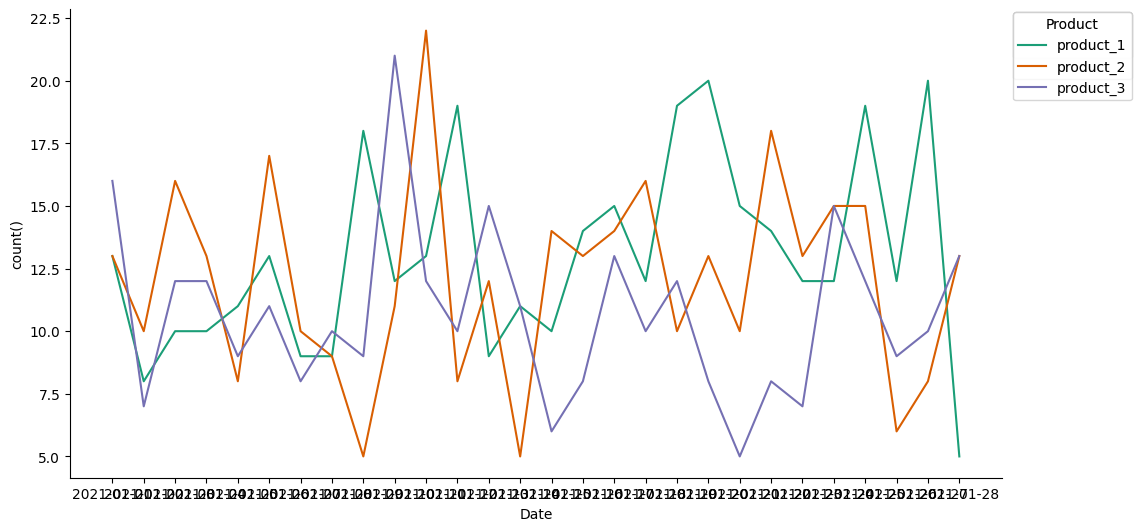

In [ ]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

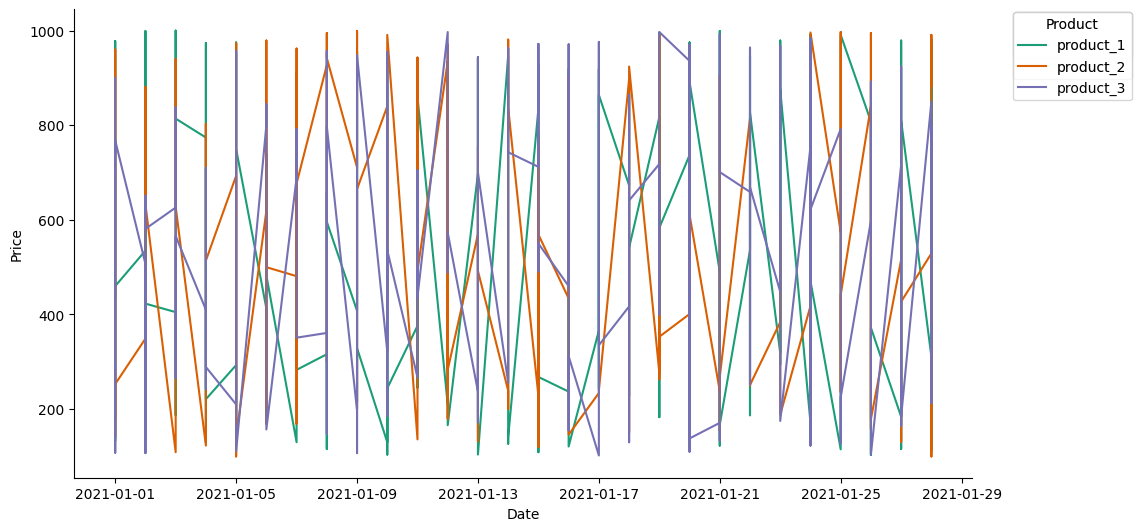

In [ ]:
# @title Date vs Price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Price')

In [ ]:
def col_kde(data):
    fig, ax = plt.subplots()
    sns.kdeplot(data=data, ax=ax, x='Price', hue='Product', fill=True)
    # Добавим линию среднего значения
    plt.axvline(data['Price'].median(), color='b', linestyle='-', label='Медиана')
    plt.axvline(data['Price'].mean(), color='b', linestyle='--', label='Среднее значение')
    plt.legend()
    plt.xlabel(f'Price')
    plt.title(f'Плотность распределения Price')
    plt.show()

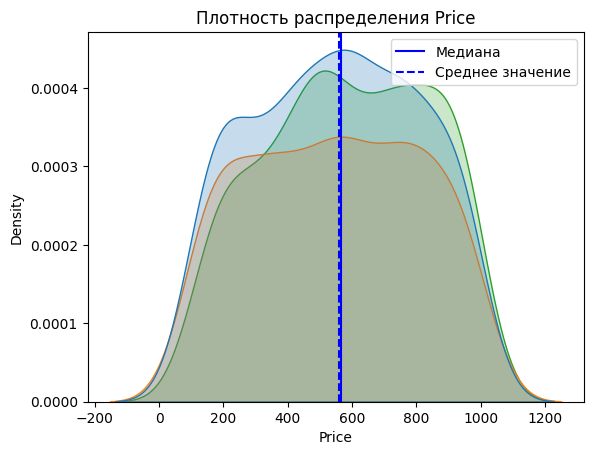

In [ ]:
 col_kde(df)

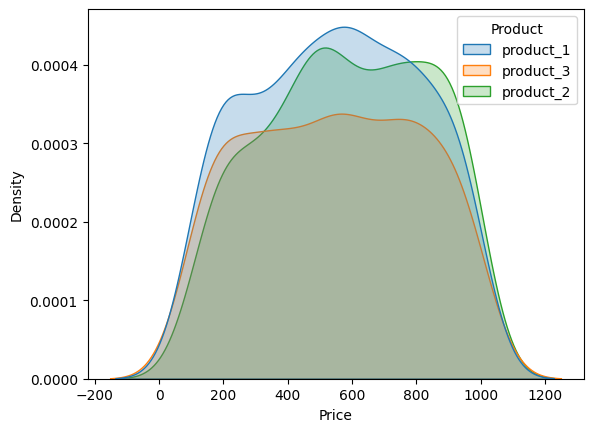

In [ ]:
sns.kdeplot(data=df, x='Price', hue='Product', fill=True)
plt.show()

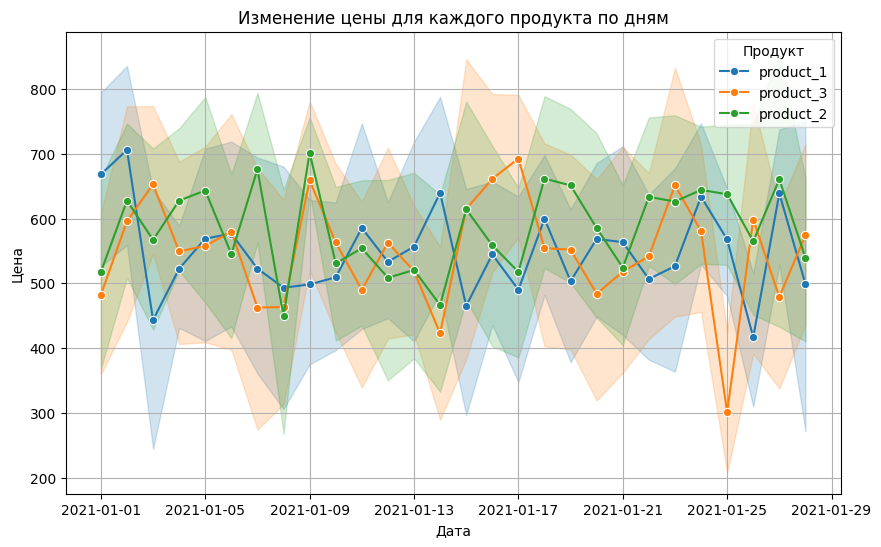

In [ ]:
# Строим график изменения цены для каждого продукта по дням
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Price', hue='Product', marker='o')

# Настройка графика
plt.title('Изменение цены для каждого продукта по дням')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend(title='Продукт')
plt.grid(True)

# Показываем график
plt.show()

In [ ]:
df_phik = df.phik_matrix(interval_cols=['Price']).round(2)
df_phik

,Product,Date,Price
Product,1.00,0.15,0.00
Date,0.15,1.00,0.13
Price,0.00,0.13,1.00


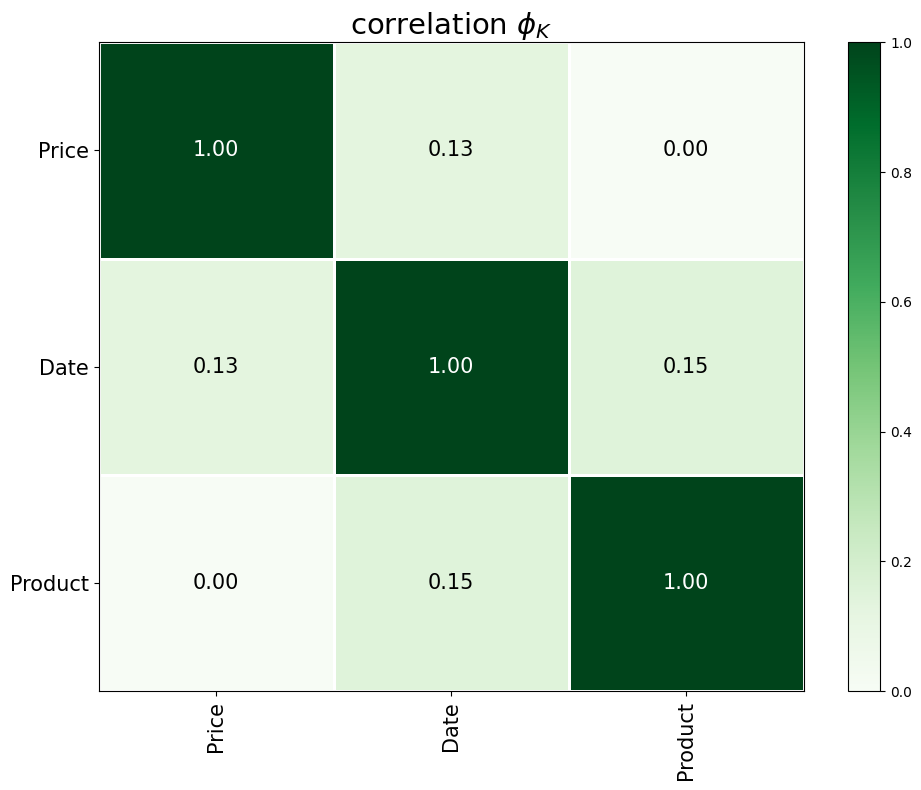

In [ ]:
plot_correlation_matrix(
    df_phik.values,
    x_labels=df_phik.columns,
    y_labels=df_phik.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(10, 8)
)